In [11]:
fields = [
    "VendorID",
    "lpep_pickup_datetime",
    "Trip_distance",
    "Fare_amount",
    "Total_amount",
]
meanings = {
    "VendorID": "供应商ID",
    "lpep_pickup_datetime": "接客时间",
    "Trip_distance": "行程距离",
    "Fare_amount": "车费金额",
    "Total_amount": "总费用",
}

print("Field Meanings:")
for name, meaning in meanings.items():
    print(f"{name}: {meaning}")

import pandas as pd

df = pd.read_csv("green_tripdata_2015-12.csv", usecols=lambda c: c in fields)

Field Meanings:
VendorID: 供应商ID
lpep_pickup_datetime: 接客时间
Trip_distance: 行程距离
Fare_amount: 车费金额
Total_amount: 总费用


In [12]:
# 总费用最高的纪录
print(df.loc[df['Total_amount'].idxmax()])

VendorID                                  2
lpep_pickup_datetime    2015-12-01 00:50:11
Trip_distance                        162.29
Fare_amount                           826.0
Total_amount                          827.3
Name: 505, dtype: object


In [13]:
def clean_data(df):
    df = df.copy()
    for col in ("Trip_distance", "Fare_amount", "Total_amount"):
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df = df[df[col].notna()]
        df = df[df[col] >= 0]
    return df

df = clean_data(df)
print(df.head(10))

   VendorID lpep_pickup_datetime  Trip_distance  Fare_amount  Total_amount
0         2  2015-12-01 00:12:54           1.27          6.5          9.36
1         2  2015-12-01 00:48:19           3.57         12.5         15.80
2         2  2015-12-01 00:06:13           3.51         13.5         19.24
3         2  2015-12-01 00:43:38           2.43         12.5         16.56
4         2  2015-12-01 00:04:50           0.89          5.5          7.80
5         2  2015-12-01 00:38:47           0.74          5.5          8.84
6         2  2015-12-01 00:56:09           4.56         15.0         16.30
7         2  2015-12-01 00:00:52           5.43         17.5         22.56
8         2  2015-12-01 00:07:44           1.24          7.0          8.30
9         2  2015-12-01 00:40:00           0.92          5.5          6.80


Trip_distance - Max: 236.1, Min: 0.0, Mean: 2.8375225914169744
Total_amount - Max: 827.3, Min: 0.0, Mean: 14.799366051042119


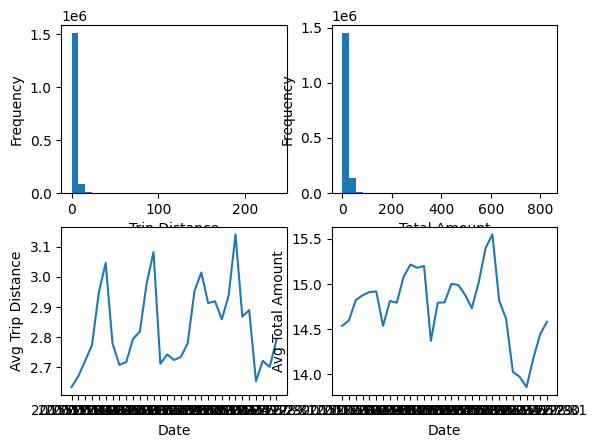

In [25]:
from matplotlib import pyplot as plt

for col in ["Trip_distance", "Total_amount"]:
    print(f"{col} - Max: {df[col].max()}, Min: {df[col].min()}, Mean: {df[col].mean()}")

fig, ax = plt.subplots(2, 2)
ax[0, 0].hist(df["Trip_distance"], bins=30)
ax[0, 0].set_xlabel("Trip Distance")
ax[0, 0].set_ylabel("Frequency")
ax[0, 1].hist(df["Total_amount"], bins=30)
ax[0, 1].set_xlabel("Total Amount")
ax[0, 1].set_ylabel("Frequency")
ax[1, 0].plot(
    df.groupby(df["lpep_pickup_datetime"].str.slice(0, 10))["Trip_distance"].mean()
)
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("Avg Trip Distance")
ax[1, 1].plot(
    df.groupby(df["lpep_pickup_datetime"].str.slice(0, 10))["Total_amount"].mean()
)
ax[1, 1].set_xlabel("Date")
ax[1, 1].set_ylabel("Avg Total Amount")
plt.show()